# Practical exam

In [1]:
### Please state your name here:
my_name = 'Munteanu Victor'


In [2]:
# make sure requirements are up to date
%pip install --upgrade pip >> results/requirements_log.txt
%pip install -r ../requirements.txt >> results/requirements_log.txt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### 1.

Given the below snippet, add the necessary code lines in function f2 in order to obtain the expected output:

In [3]:
def f2(n):
    for i in range(1, n):
        print(f"~~~ {i}")
        yield {'cubed': i ** 3} 
        yield {'squared': i ** 2}
        yield f'@@@ {i}'
    
    



n = 5
for x in f2(n):
    print(x)

~~~ 1
{'cubed': 1}
{'squared': 1}
@@@ 1
~~~ 2
{'cubed': 8}
{'squared': 4}
@@@ 2
~~~ 3
{'cubed': 27}
{'squared': 9}
@@@ 3
~~~ 4
{'cubed': 64}
{'squared': 16}
@@@ 4


Expected output:

```
~~~ 1
{'cubed': 1}
{'squared': 1}
@@@ 1
~~~ 2
{'cubed': 8}
{'squared': 4}
@@@ 2
~~~ 3
{'cubed': 27}
{'squared': 9}
@@@ 3
~~~ 4
{'cubed': 64}
{'squared': 16}
@@@ 4
```

### 2.

Under **resources**, there are two input files, [input_file_1.csv](/2022/python_workshop/notebooks/resources/input_file_1.csv) and [input_file_2.csv](/2022/python_workshop/notebooks/resources/input_file_2.csv).

Given the two input files, remove the duplicates.

If rows in all files are combined, there must be NO duplicates. Solution should include 2 functions, one for reading data from files and one for writing data to files. A partial solution without functions is accepted.

Expected output: two separate output files under results/expected, [output_file_1.csv](/2022/python_workshop/notebooks/results/expected/output_file_1.csv) and [output_file_2.csv](/2022/python_workshop/notebooks/results/expected/output_file_2.csv).

### 3.

Using the [data.gov.ro](https://data.gov.ro/dataset/acreditarea-unitatilor-sanitare-2021) API, extract the "accredited hospitals 2021" data set (link available below).

Alternatively, if the API is down, use the backup file **hospitals.csv** from the **resources** folder as a source.

In [4]:
import requests
import pandas as pd

In [5]:
url_hospitals = 'https://data.gov.ro/dataset/4197b53e-7c91-4fcc-be07-883076d40ffc/resource/7a343719-d625-4b5c-98b5-895a684d61c4/download/anmcs-acreditare-unitati-sanitare-dec2021.json'


hospitals = pd.read_json(url_hospitals)

hospitals.head()

,Nr. Crt.,Nume,Cod A.N.M.C.S.,Judet,Clasificare,TIP USP (in functie de specificul patologiei tratate),TIP USP (in functie de regimul proprietatii),TIP USP (din punct de vedere al invatamantului si al cercetarii stiintifice medicale),Adresa completa a sediului principal,Adresa email oficiala,Website,Autoritatea tutelara,Acreditare ciclul I,Acreditare ciclul II,,__1,__2
0,1,SPITALUL MUNICIPAL CALAFAT,A001,Dolj,IV,general,public,fara invatamant,"B-dul. T. Vladimirescu, Nr. 24, Calafat, cod 2...",spitalcalafat@gmail.com,spitalcalafat.ro,PRIMARIA MUNICIPIULUI CALAFAT,Acreditat,Categoria V Decizie de prelungire a procesului...,,,
1,2,SPITALUL DE PSIHIATRIE CRONICI SCHITU GRECI,A002,Olt,V,afectiuni cronice,public,fara invatamant,SLATINA STR. A. I. CUZA NR. 14,spitalulschitu@gmail.com,www.spitalul-schitu.ro,CONSILIUL JUDETEAN OLT,Acreditat,Categoria V Decizie de prelungire a procesului...,,,
2,3,SPITALUL CLINIC NICOLAE MALAXA,A003,Bucuresti,III,general,public,clinic cu sectii universitare,"STR. DIMITRIE CANTEMIR, NR.1, PARTER, SECT.4, ...",secretariat@spitalmalaxa.ro,www.spitalmalaxa.ro,ASSMB,Acreditat,Categoria IV Acreditat cu incredere redusa,,,
3,4,"SPITALUL MILITAR DE URGENTA ""REGINA MARIA"" BRA?OV",A004,Brasov,III,urgenta,public,fara invatamant,"Bucuresti, Str. Institutul Medico-Militar, Nr....",smureginamaria@rdsbv.ro,www.smubrasov.ro,DIRECtIA MEDICALa a Ministerului Apararii Nati...,Acreditat,Categoria II Acreditat cu recomandari,,,
4,5,SPITALUL ORASENESC INEU,A005,Arad,IV,general,public,fara invatamant,"Calea Republicii, nr. 5",spitalineu@yahoo.ro,http://www.spitalineu.ro,Primaria Orasului Ineu,Acreditat,Categoria V Decizie de prelungire a procesului...,,,


How many rows are in this dataset?

In [6]:
hospitals.shape[0]

1365

What are the columns in this dataset?

In [7]:
hospitals.shape[1]

17

Drop the unnecessary columns:
* Nr. Crt.
* TIP USP (din punct de vedere al invatamantului si al cercetarii stiintifice medicale)
* the last three columns

In [8]:
hospitals.columns
hospitals.drop(hospitals.columns[[0, 7, 14, 15, 16]], axis=1, inplace=True)



Apply the following transformations to the columns, so that they are easier to work with:
* lowercase all columns
* `TIP USP (in functie de specificul patologiei tratate)` rename to `tip_patologie`
* `TIP USP (in functie de regimul proprietatii)` rename to `tip`
* `Adresa completa a sediului principal` rename to `adresa`
* `Adresa email oficiala` rename to `email`
* `Autoritatea tutelara` rename to `autoritate_tutelara`
* `Acreditare ciclul I` rename to `acreditare_i`
* `Acreditare ciclul II` rename to `acreditare_ii`

In [9]:
hospitals.rename(
    columns={'TIP USP (in functie de specificul patologiei tratate)': 'tip_patologie',
    'TIP USP (in functie de regimul proprietatii)': 'tip',
    'Adresa completa a sediului principal': 'adresa',
    'Adresa email oficiala': 'email',
    'Autoritatea tutelara': 'autoritate_tutelara',
    'Acreditare ciclul I': 'acreditare_i',
    'Acreditare ciclul II': 'acreditare_ii'
    },
    inplace=True
)
hospitals.rename(columns=lambda x: x.lower(), inplace=True)



The total number of hospitals in this dataset is 762, however the actual number of rows is greater than that.

Identify and remove the empty (blank space) rows.

In [10]:

hospitals =  hospitals.replace(r'^s*$', float('NaN'), regex = True)
hospitals.dropna(inplace=True)


How many public hospitals and how many private hospitals are in this dataset?

In [11]:
public = hospitals[hospitals['tip'] == 'public'].tip.value_counts()
privat = hospitals[hospitals['tip'] == 'privat'].tip.value_counts()
print(public)
print(privat)


public    380
Name: tip, dtype: int64
privat    382
Name: tip, dtype: int64


Inspect the values in the `acreditare_i` column + print them.

In [12]:
hospitals['acreditare_i']

0      Acreditat
1      Acreditat
2      Acreditat
3      Acreditat
4      Acreditat
         ...    
757            -
758            -
759            -
760            -
761            -
Name: acreditare_i, Length: 762, dtype: object

Create a dataframe containing the hospitals that are *not* accredited.

In [13]:
hospitals.head()
not_acrredited = hospitals['acreditare_i'] == 'Neacreditat'
not_acrredited_hospitals = hospitals[not_acrredited]

How many hospitals are *not* accredited?

In [14]:
not_acrredited_hospitals.value_counts().sum()

2

Pick a county (judet) for a more in-depth analysis.
(Bucuresti is also a county)

In [15]:
jud_cluj = hospitals[hospitals['judet'] == 'Cluj']
jud_cluj.head()

,nume,cod a.n.m.c.s.,judet,clasificare,tip_patologie,tip,adresa,email,website,autoritate_tutelara,acreditare_i,acreditare_ii
12,"INSTITUTUL ONCOLOGIC ""PROF. DR. I. CHIRICUTA",A013,Cluj,I M,specialitate,public,"Strada Cristian Popi?teanu, nr. 1-3, sector 1,...",office@iocn.ro,www.iocn.ro,Ministerul Sanatatii,Acreditat,Categoria III Acreditat cu rezerve
26,SPITALUL DE BOLI PSIHICE CRONICE BORSA,A029,Cluj,V,pentru bolnavi cu afectiuni cronice,public,"CALEA DOROBANTILOR,NR.106,CLUJ NAPOCA,CLUJ",office@spitalpsihiatrieborsa.ro,www.spitalpsihiatrieborsa.ro,CONSILIUL JUDETEAN CLUJ,Acreditat,Categoria II Acreditat cu recomandari
32,SPITALUL MUNICIPAL GHERLA,A037,Cluj,IV,general,public,"GHERLA, STR.BOBALNA NR.2",secretariat@spitalgherla.ro,www.spitalgherla.ro,PRIMARIA MUNICIPIULUI GHERLA,Acreditat,Categoria V Decizie de prelungire a procesului...
44,PENITENCIARUL SPITAL DEJ,A050,Cluj,III,general,public,STR. MARIA GHICULEASA NR.47,psdej@anp.gov.ro,http://anp.gov.ro/penitenciarul-spital-dej/,ANP,Acreditat,Categoria II Acreditat cu recomandari
55,SOCIETATEA MEDISPROF SRL,A062,Cluj,Neclasificat,pentru bolnavi cu afectiuni cronice,privat,"PIATA 1 MAI NR. 3, CLUJ-NAPOCA, JUD. CLUJ",office@medisprof.ro,www.medisprof.ro,MEDISPROF SRL,Acreditat,Categoria V Decizie de prelungire a procesului...


According to this dataset, how many hospitals are in this county?

In [16]:
jud_cluj.value_counts().sum()

36

For the chosen county, create a Dataframe that contains the following information:
* judet
* tip (public, privat)
* count of unaccredited hospitals
* count of accredited hospitals

In [20]:
stat = hospitals[hospitals['judet'] == 'Cluj']
stat = stat.assign(
    unaccredited = lambda x: x.acreditare_i.isin(['Neacreditat']),
    accredited = lambda x: x.acreditare_i.isin(['Acreditat']),

)

stat = stat[['judet', 'tip', 'unaccredited', 'accredited']]
stat.head()

,judet,tip,unaccredited,accredited
12,Cluj,public,False,True
26,Cluj,public,False,True
32,Cluj,public,False,True
44,Cluj,public,False,True
55,Cluj,privat,False,True


Create a plot that highlights
* the number of accredited public hospitals
* the number of accredited private hospitals
* the number of unaccredited public hospitals
* the number of unaccredited private hospitals

The expected output for Bucuresti can be found  [here](/2022/python_workshop/notebooks/results/expected/output_test.png).

In [21]:
import matplotlib

stat['unaccredited'] = stat['unaccredited'].astype(int)
stat['accredited'] = stat['accredited'].astype(int)

plot_acreditat = stat.pivot_table(index='tip', columns='judet', values='accredited', aggfunc='sum')

<AxesSubplot:title={'center':'Acreditat'}, xlabel='tip', ylabel='cate'>

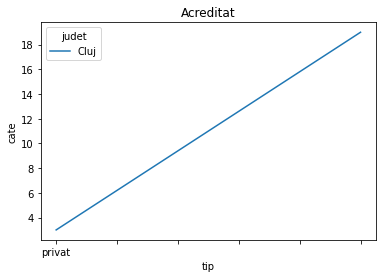

In [23]:
plot_acreditat.plot(title='Acreditat', ylabel='cate')

In [24]:
plot_neacreditat = stat.pivot_table(index='tip', columns='judet', values='unaccredited', aggfunc='sum')

<AxesSubplot:title={'center':'neacreditat'}, xlabel='tip', ylabel='cate'>

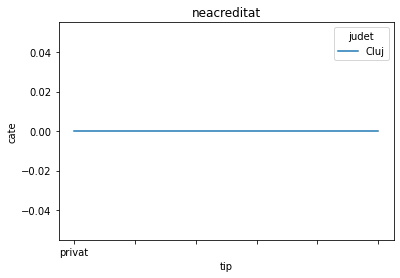

In [26]:
plot_neacreditat.plot(title= f'neacreditat', ylabel='cate')


In [27]:
from functools import reduce



plot_data = reduce(lambda left,right: pd.merge(left,right,on=['tip'], how='inner'), [plot_acreditat, plot_neacreditat])

plot_data.head()

judet,Cluj_x,Cluj_y
tip,,
privat,3,0
public,19,0


<AxesSubplot:xlabel='tip'>

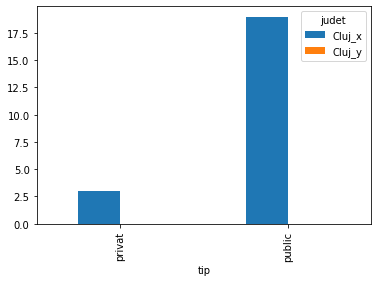

In [28]:
plot_data.plot(kind="bar")